# 0.0 IMPORTS



In [1]:
import numpy as np
import inflection
import math
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]
from IPython.core.display import HTML
from IPython.display import Image 
import datetime
%matplotlib inline


## 0.1 Helper Functions

## 0.2 Loading data

In [2]:
import pandas as pd


In [3]:
df_sales_raw = pd.read_csv('C:/Users/Mayra/Desktop/repos/Predict-Time-Series-Test/data/train.csv', low_memory = False)
df_store_raw = pd.read_csv('C:/Users/Mayra/Desktop/repos/Predict-Time-Series-Test/data/store.csv', low_memory = False)


#merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how =  'left', on = 'Store')

In [4]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
502099,20,1,2014-04-07,10284,1144,1,0,0,0,d,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"


# 1.0 DESCRIÇÃO DOS DADOS

In [5]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snackecase = lambda x: inflection.underscore( x )

cols_new = list(map(snackecase, cols_old))

#Rename Columns
df1.columns = cols_new

In [7]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [8]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimension

In [9]:
print( 'Number of rowns: {}'.format(df1.shape[0]))
print( 'Number of columns: {}'.format(df1.shape[1]))

Number of rowns: 1017209
Number of columns: 18


## 1.3 Data Types

In [10]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA

In [11]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [12]:
df1.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
188715,281,4,2015-02-12,4743,506,1,0,0,0,d,c,6970.0,9.0,2011.0,0,NaN,NaN,NaN


In [13]:
##competition_distance  
df1['competition_distance']= df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x )

##competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) 
else x['competition_open_since_month'], axis = 1)

##competition_open_since_year    
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) 
else x['competition_open_since_year'], axis = 1)                             

##promo2_since_week 
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) 
else x['promo2_since_week'], axis = 1) 

##promo2_since_year 
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) 
else x['promo2_since_year'], axis = 1) 

##promo_interval 
month_map = {1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}

df1['promo_interval'].fillna(0, inplace = True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') 
else 0, axis = 1)


In [14]:
df1.sample(5).T

,190780,270740,25735,510422,479024
store,116,840,91,538,360
day_of_week,2,2,3,1,1
date,2015-02-10 00:00:00,2014-11-25 00:00:00,2015-07-08 00:00:00,2014-03-31 00:00:00,2014-04-28 00:00:00
sales,6539,9355,3812,6432,10189
customers,753,1216,430,807,967
open,1,1,1,1,1
promo,0,1,0,1,1
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,a,a,c,a,a


In [15]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types

In [16]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [17]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year']= df1['promo2_since_year'].astype(int)

In [18]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statiscal

In [19]:
num_attributes = df1.select_dtypes(include = ['int32','int64','float64'])
cat_attributes = df1.select_dtypes(exclude = ['int32','int64','float64','datetime64[ns]'])

### 1.7.1 Numerical attributes

In [20]:
#tendencia central - mean,median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#dispersão  - std,min,max,range,skew,kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenar
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


<AxesSubplot:xlabel='sales'>

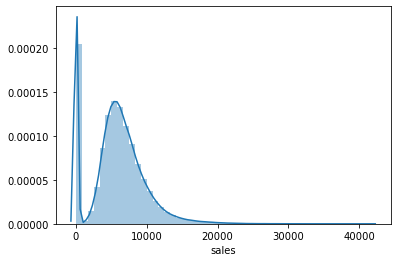

In [21]:
sns.distplot(df1['sales'])

### 1.7.2 Categorical attributes

In [22]:
cat_attributes.apply( lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

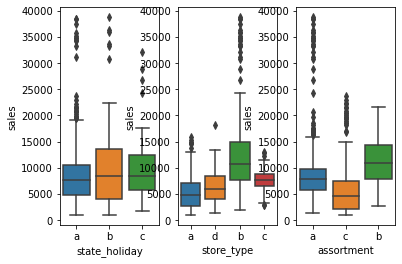

In [23]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0 )]

plt.subplot(1,3,1)
sns.boxplot(x = 'state_holiday', y = 'sales', data = aux1)

plt.subplot(1,3,2)
sns.boxplot(x = 'store_type', y = 'sales', data = aux1)

plt.subplot(1,3,3)
sns.boxplot(x = 'assortment', y = 'sales', data = aux1)




# 2.0 FEATURE ENGINERING

## 2.1 Mapa Mental de hipóteses 

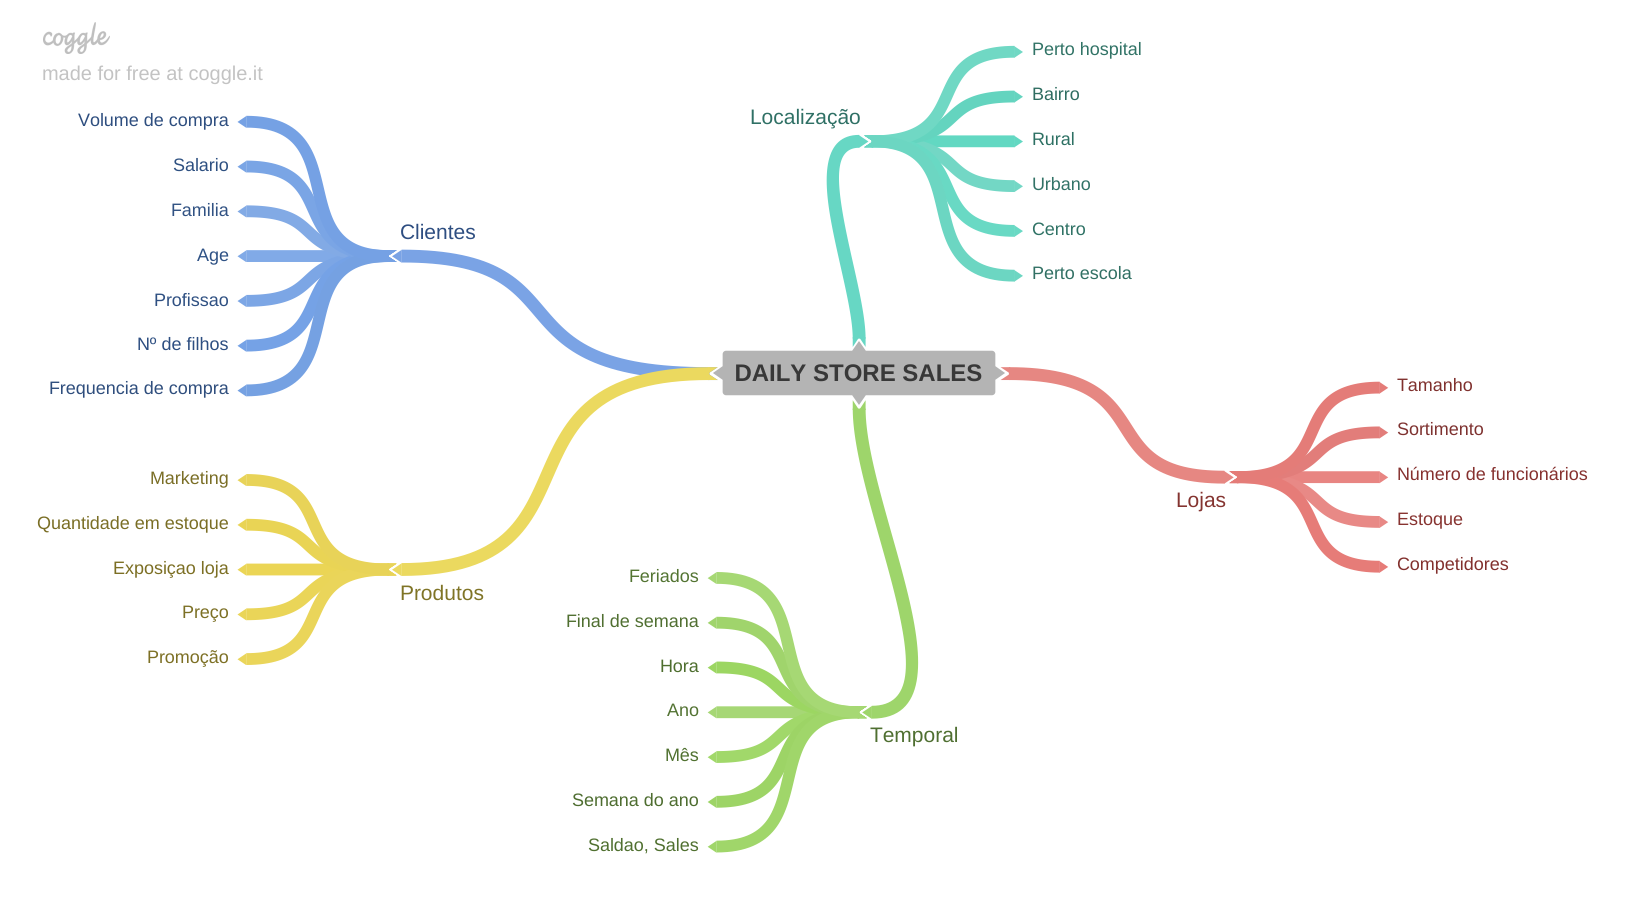

In [24]:
Image('C:/Users/Mayra/Desktop/repos/Predict-Time-Series-Test/img/Mind_Map_hipoteses.png')

## 2.2 Criação das hipóteses

### 2.2.1 Hipóteses Loja

**1.** Lojas com maior número de funcionarios deveriam vender mais

**2.** Lojas com maior porte deveriam vender mais

**3.** Lojas com menor porte deveriam vender menos

**4.** Lojas com maior estoque deveriam vender mais

**5.** Lojas com maior sortimento deveriam vender mais

**6.** Lojas com mais competidores deveriam vender menos.

**7.** Lojas com competidores a mais tempo deveriam vender mais

### 2.2.2 Hipóteses produto

**1.** Lojas com investem mais em Marketing deveriam vender mais

**2.** Lojas que expoe mais o produto na vitrine deveriam vender mais

**3.** Lojas que tem preços menores deveriam vender mais

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais

**5.** Lojas com promoções mais agressivas deveriam vender mais

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais

**7.** Lojas com mais dias de promoção deveriam vender mais

**8.** Lojas com mais promoções consecutivas deveriam vender mais


### 2.2.3 Hipóteses Temporal

**1.** Lojas que tem mais feriados deveriam vender menos

**2.** Lojas deveraim vender mais ao longo dos anos.

**3.** Lojas que abrem nos finais de semana deveriam vender mais

**4.** Lojas deveriam vender menos durante os feriados escolares

**5.** Lojas com deveriam vender mais depois do dia 10 de cada mês.

**6.** Lojas abertas durante o feriado de natal deveriam vender mais.

## 2.3 Lista final de hipóteses

**1.** Lojas com maior sortimento deveriam vender mais

**2.** Lojas com mais competidores deveriam vender menos.

**3.** Lojas com competidores a mais tempo deveriam vender mais

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais

**5.** Lojas com mais dias de promoção deveriam vender mais

**6.** Lojas com mais promoções consecutivas deveriam vender mais

**7.** Lojas que tem mais feriados deveriam vender menos

**8.** Lojas abertas durante o feriado de natal deveriam vender mais.

**9.** Lojas deveraim vender mais ao longo dos anos.

**10.** Lojas que abrem nos finais de semana deveriam vender mais

**11.** Lojas deveriam vender menos durante os feriados escolares

**12.** Lojas com deveriam vender mais depois do dia 10 de cada mês.


In [25]:
df2 = df1.copy()

## 2.3 Feature enginnering

In [26]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

#yeek of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year of week
df2['year_of_week'] = df2['date'].dt.strftime( '%Y-%W' )


#promo_since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)



C:\Users\Mayra\.conda\envs\MachineLearningText\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


In [27]:
#competiton_since
import datetime
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'],month=x['competition_open_since_month'],day=1),axis = 1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)





In [28]:
#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

#state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x:'public_holiday' if x == 'a'  else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')



In [29]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 FILTRAGEM DE VARIÁVEIS

In [30]:
df3 = df2.copy()

In [31]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_of_week,promo_since,promo_time_week,competition_since,competition_time_month
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2015-07-27,0,2008-09-01,84
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2010-03-22,279,2007-11-01,94
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2011-03-28,226,2006-12-01,105
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2015-07-27,0,2009-09-01,71
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-07-27,0,2015-04-01,4


## 3.1 Filtragem das linhas

In [32]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2 Seleção das colunas

In [33]:
cols_drop = ['customers','open','promo_interval','month_map']
df3 = df3.drop(cols_drop, axis = 1)

In [34]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_of_week', 'promo_since', 'promo_time_week',
       'competition_since', 'competition_time_month'],
      dtype='object')

# 4.0 ANÁLISE EXPLORATÓRIA DE DADOS

In [35]:
df4 = df3.copy()

AttributeError: 'bool' object has no attribute 'items'

## 4.1 Análise Univariada

### 4.1.1 Response Variable

<AxesSubplot:xlabel='sales'>

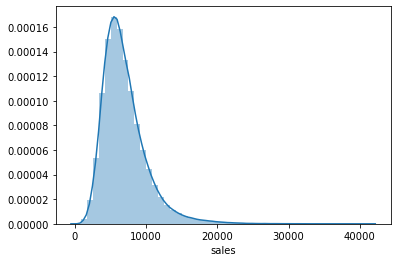

In [36]:
sns.distplot(df4['sales'])

### 4.1.2 Numerical Variable

array([[<AxesSubplot:title={'center':'store'}>,
        <AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'customers'}>],
       [<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'promo'}>,
        <AxesSubplot:title={'center':'school_holiday'}>,
        <AxesSubplot:title={'center':'competition_distance'}>],
       [<AxesSubplot:title={'center':'competition_open_since_month'}>,
        <AxesSubplot:title={'center':'competition_open_since_year'}>,
        <AxesSubplot:title={'center':'promo2'}>,
        <AxesSubplot:title={'center':'promo2_since_week'}>],
       [<AxesSubplot:title={'center':'promo2_since_year'}>,
        <AxesSubplot:title={'center':'is_promo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

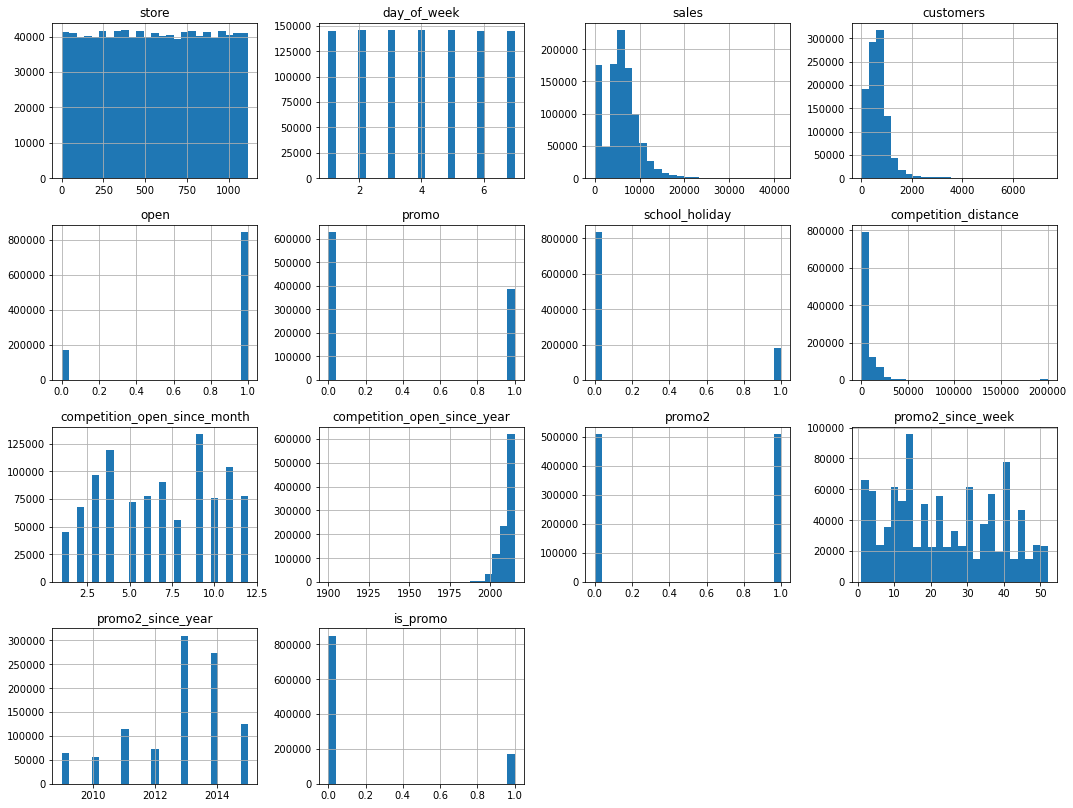

In [37]:
num_attributes.hist(bins = 25, figsize = (18,14) )

### 4.1.3 Categorical Variable

In [38]:
df4['assortment'].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

In [39]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


<AxesSubplot:>

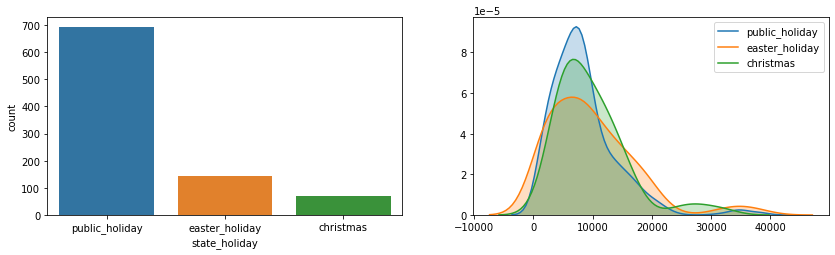

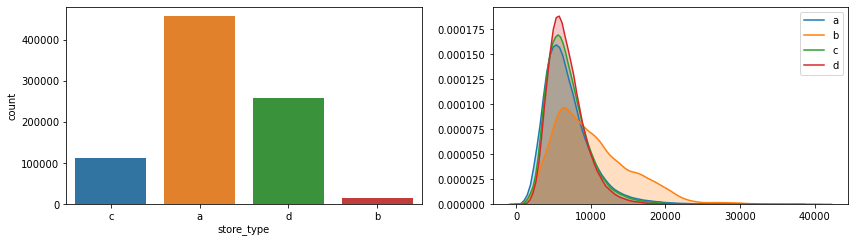

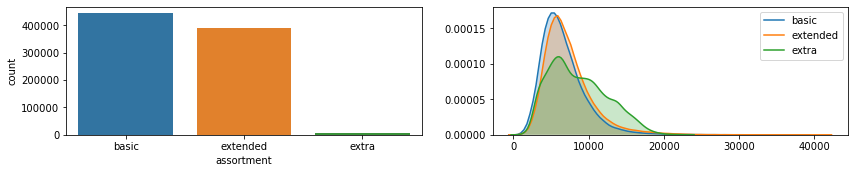

In [40]:
# state_holiday
plt.figure(figsize = (14,8))
plt.subplot(2, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'])

plt.subplot(2,2,2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'],label = 'public_holiday', shade = True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'],label = 'easter_holiday', shade = True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'],label = 'christmas', shade = True)
# store type
plt.figure(figsize = (14,8))
plt.subplot(2, 2, 3)
sns.countplot(df4['store_type'])

plt.subplot(2,2,4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'],label = 'a', shade = True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'],label = 'b', shade = True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'],label = 'c', shade = True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'],label = 'd', shade = True)

#assortment
plt.figure(figsize = (14,8))
plt.subplot(3, 2, 5)
sns.countplot(df4['assortment'])

plt.subplot(3,2,6)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'],label = 'basic', shade = True)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'],label = 'extended', shade = True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'],label = 'extra', shade = True)



## 4.2 Análise Bivariada

### **H1.** Lojas com maior sortimento deveriam vender mais
***FALSA*** Lojas com MAIOR SORTIMENTO vendem MENOS.




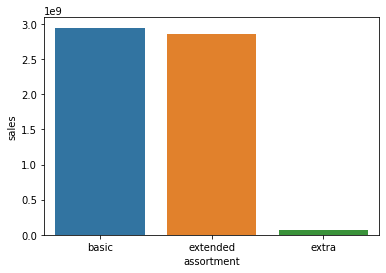

In [41]:
aux1 = df4[['assortment','sales']].groupby('assortment').sum().reset_index()
sns.barplot(x = 'assortment', y = 'sales', data = aux1);

### **H2.** Lojas com mais competidores deveriam vender menos.
***FALSA*** Lojas com COMPETIDORES mais próximos vendem MAIS.

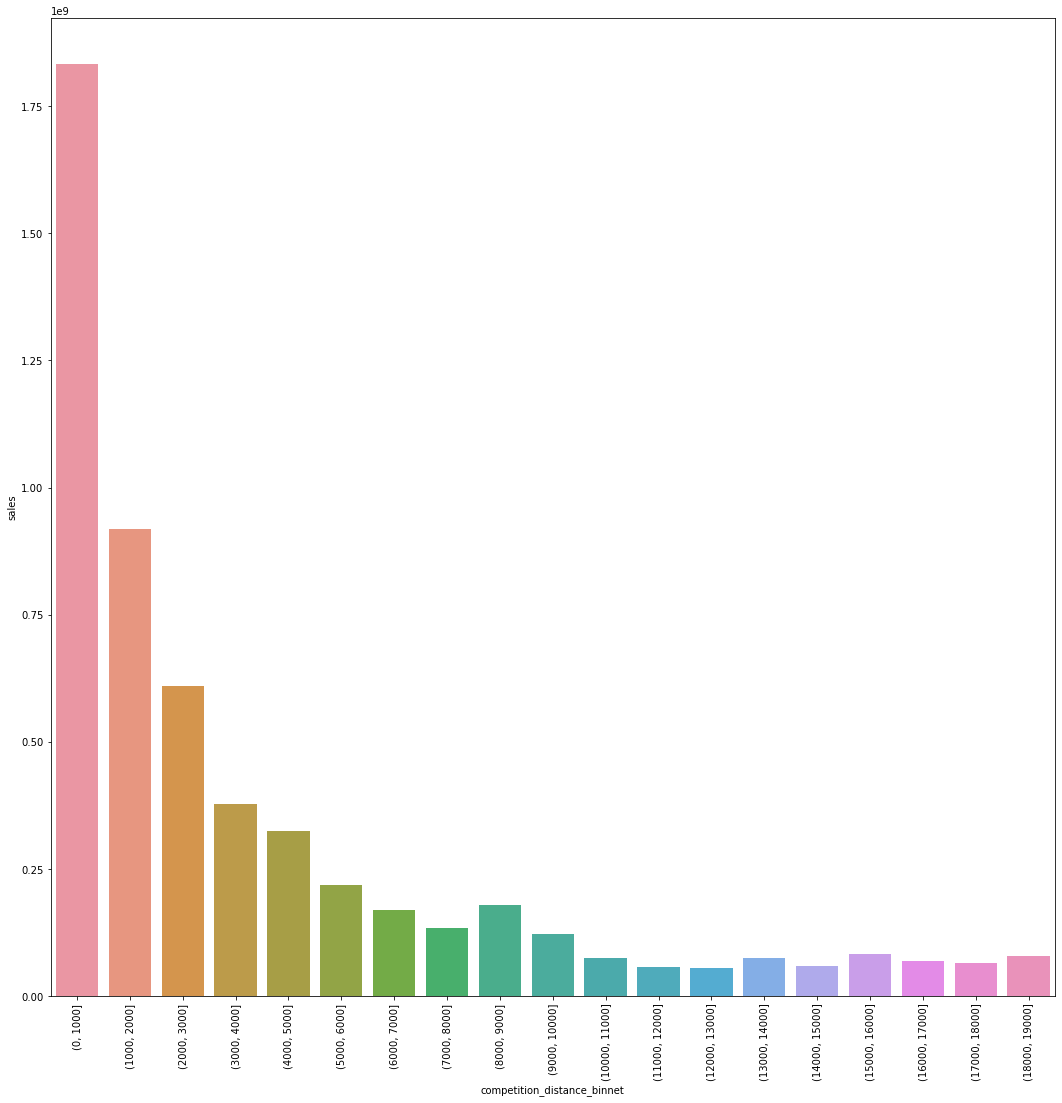

In [42]:
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

bins = list(np.arange(0,20000,1000))

aux1['competition_distance_binnet'] = pd.cut(aux1['competition_distance'], bins = bins)
aux2 = aux1[['competition_distance_binnet','sales']].groupby('competition_distance_binnet').sum().reset_index()

plt.figure(figsize = (18,18))
sns.barplot(x = 'competition_distance_binnet', y = 'sales', data = aux2)
plt.xticks(rotation = 90);

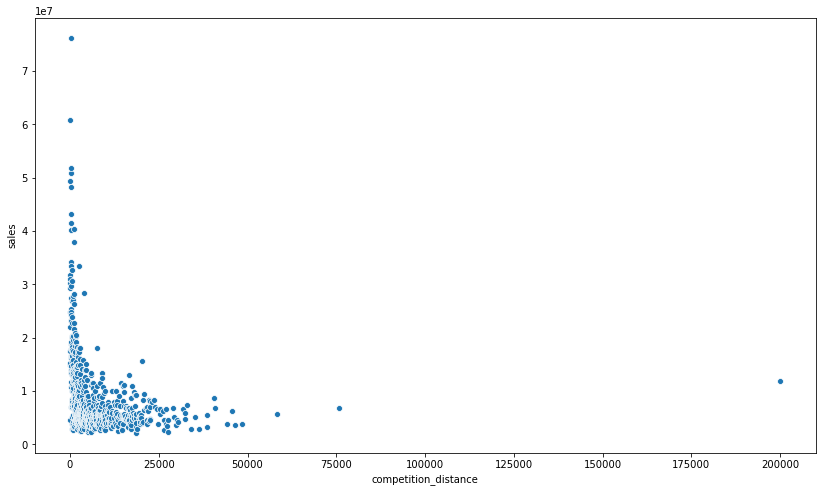

In [43]:
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()
plt.figure(figsize = (14,8))
sns.scatterplot(x = 'competition_distance', y = 'sales', data = aux1);

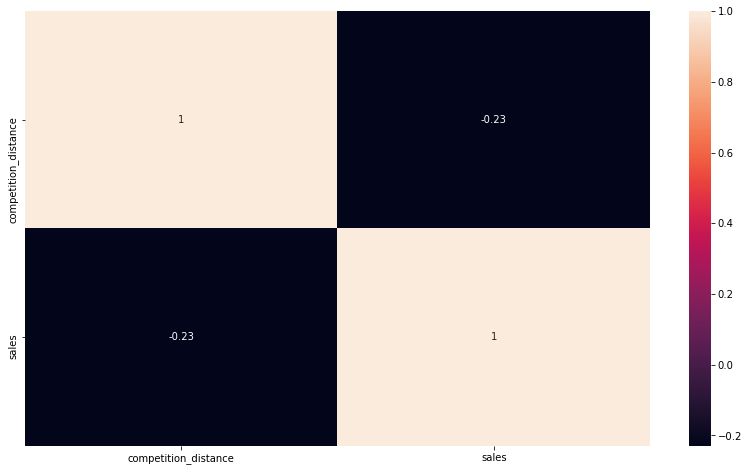

In [44]:
plt.figure(figsize = (14,8))
sns.heatmap(aux1.corr(method = 'pearson'), annot = True);

### **H3.** Lojas com competidores a mais tempo deveriam vender mais
***FALSA*** Lojas com COMPETIDORES a mais tempo vendem MENOS

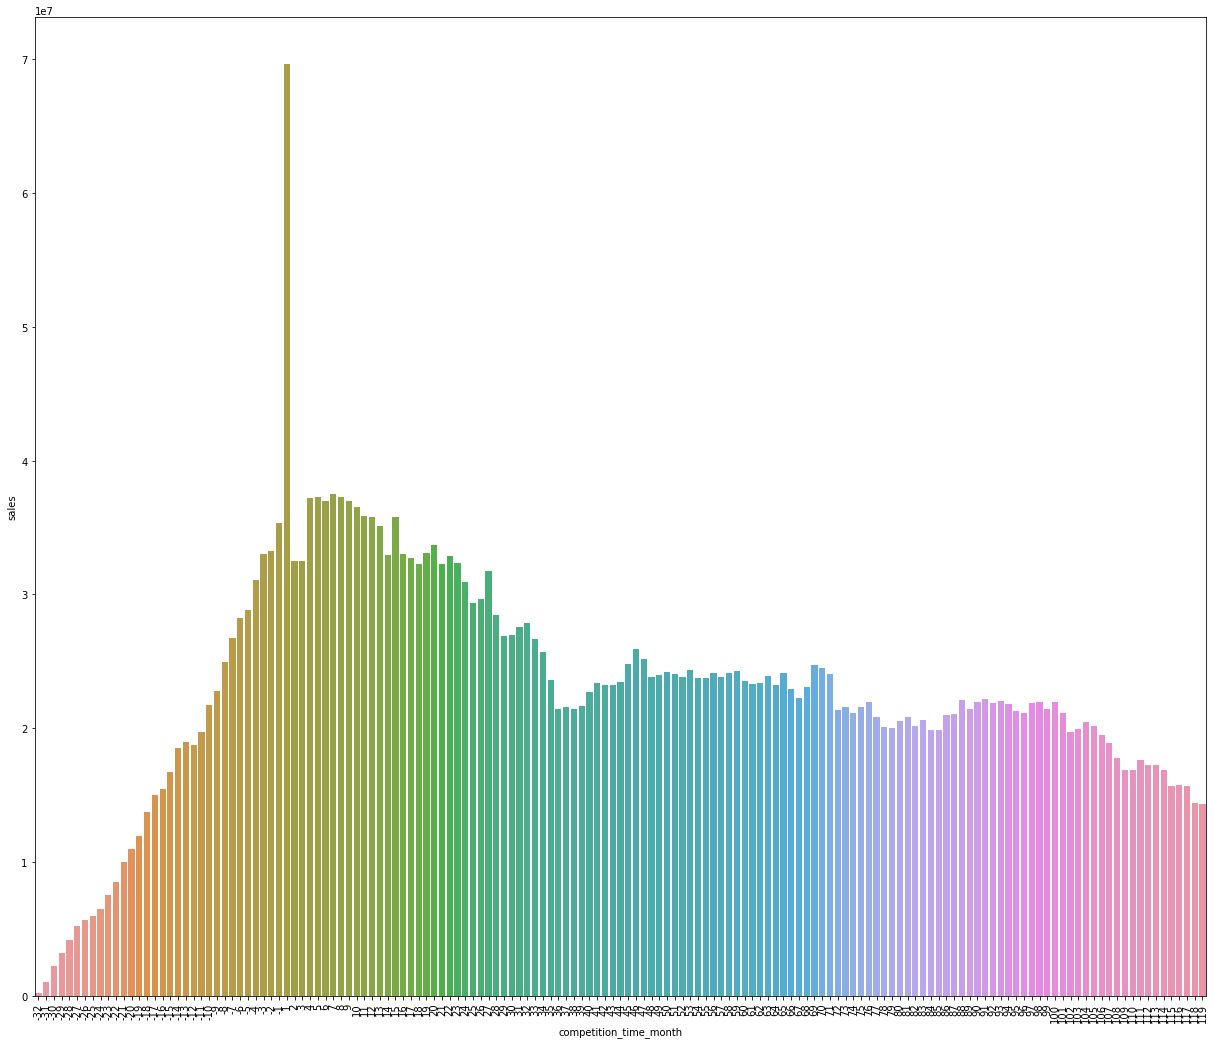

In [45]:
aux1 = df4[['competition_time_month','sales']].groupby('competition_time_month').sum().reset_index()
aux2 = aux1[(aux1['competition_time_month']  < 120 ) & (aux1['competition_time_month'] != 0 )]
plt.figure(figsize = (21,18))
sns.barplot(x = 'competition_time_month', y = 'sales', data = aux2)
plt.xticks(rotation = 90);

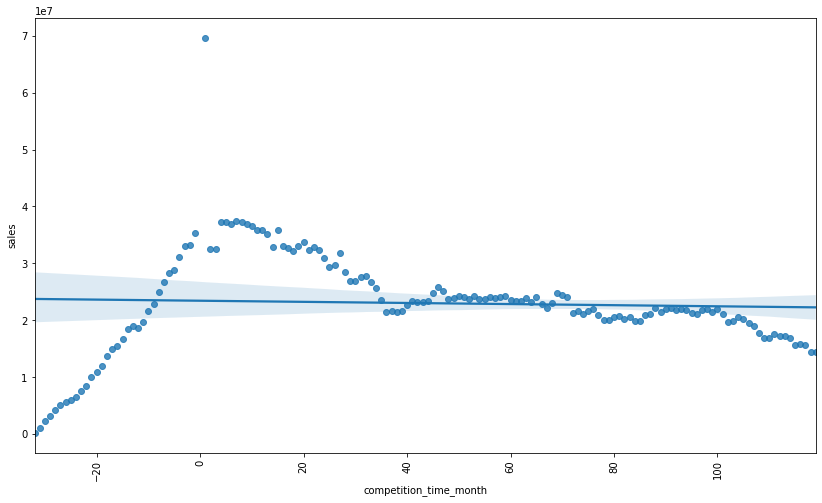

In [46]:
plt.figure(figsize = (14,8))
sns.regplot(x = 'competition_time_month', y = 'sales', data = aux2)
plt.xticks(rotation = 90);

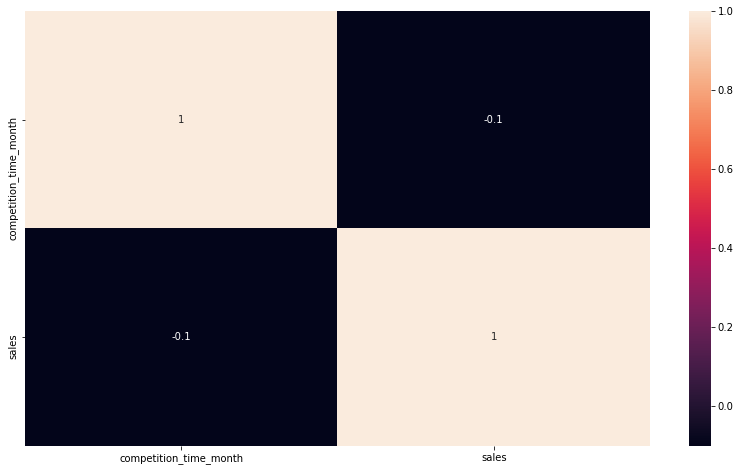

In [47]:
plt.figure(figsize = (14,8))
sns.heatmap(aux1.corr(method= 'pearson'), annot = True);

**8.** Lojas abertas durante o feriado de natal deveriam vender mais.
***FALSA***: Lojas abertas durante o feriado de Ntal vendem menos

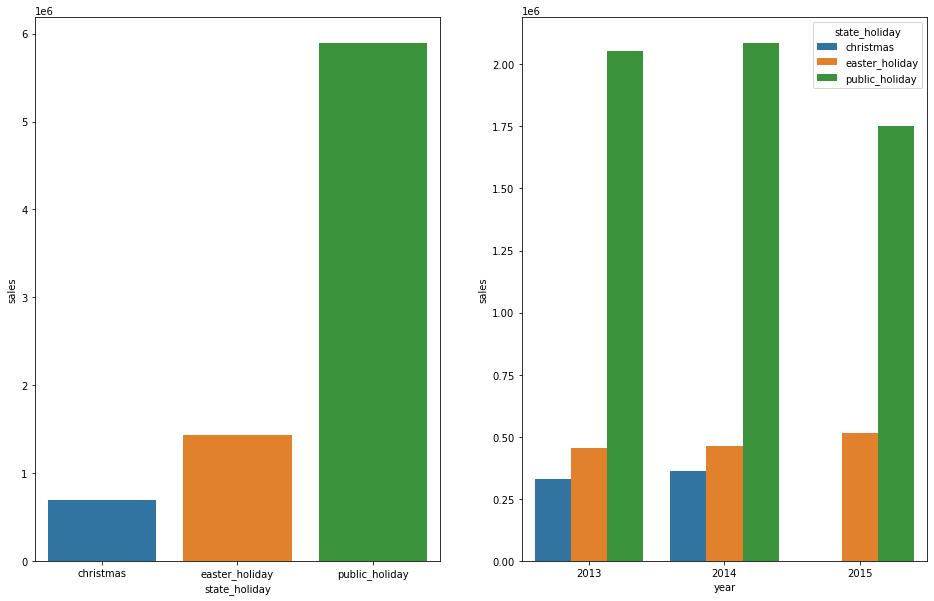

In [48]:
plt.figure(figsize = (16,10))
plt.subplot(1,2,1)
aux = df4[df4['state_holiday'] != 'regular_day']
aux1 = aux[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x = 'state_holiday', y = 'sales', data = aux1);

plt.subplot(1,2,2)
aux2 = aux[['year','state_holiday','sales']].groupby(['year','state_holiday']).sum().reset_index()
sns.barplot(x = 'year', y = 'sales', hue = 'state_holiday', data = aux2);

### **9.** Lojas deveraim vender mais ao longo dos anos.
**FALSA** Lojas vendem menos ao longo dos anos.

<AxesSubplot:>

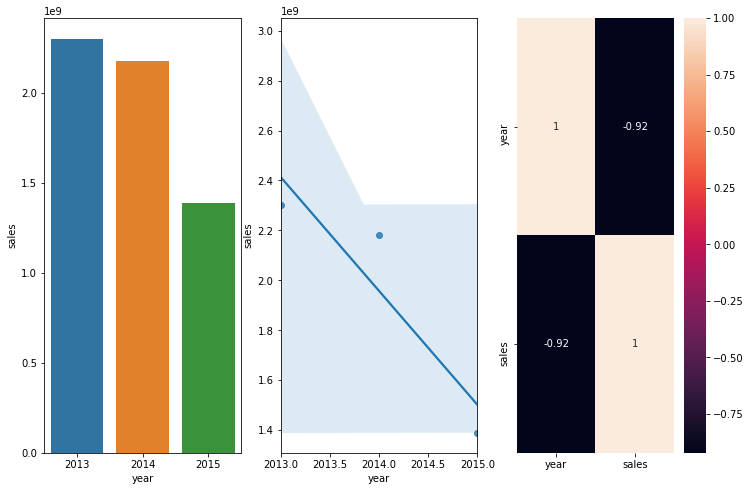

In [49]:
plt.figure(figsize = (12,8))
plt.subplot(1,3,1)
aux1 = df4[['year', 'sales']].groupby('year').sum().reset_index()
sns.barplot(x = 'year', y=  'sales', data = aux1);

plt.subplot(1,3,2)
sns.regplot(x = 'year', y=  'sales', data = aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True)


### **10.** Lojas deveriam vender mais no segundo semestre do ano
***FALSA*** Lojas vendem menos no segundo semestre do ano

<AxesSubplot:>

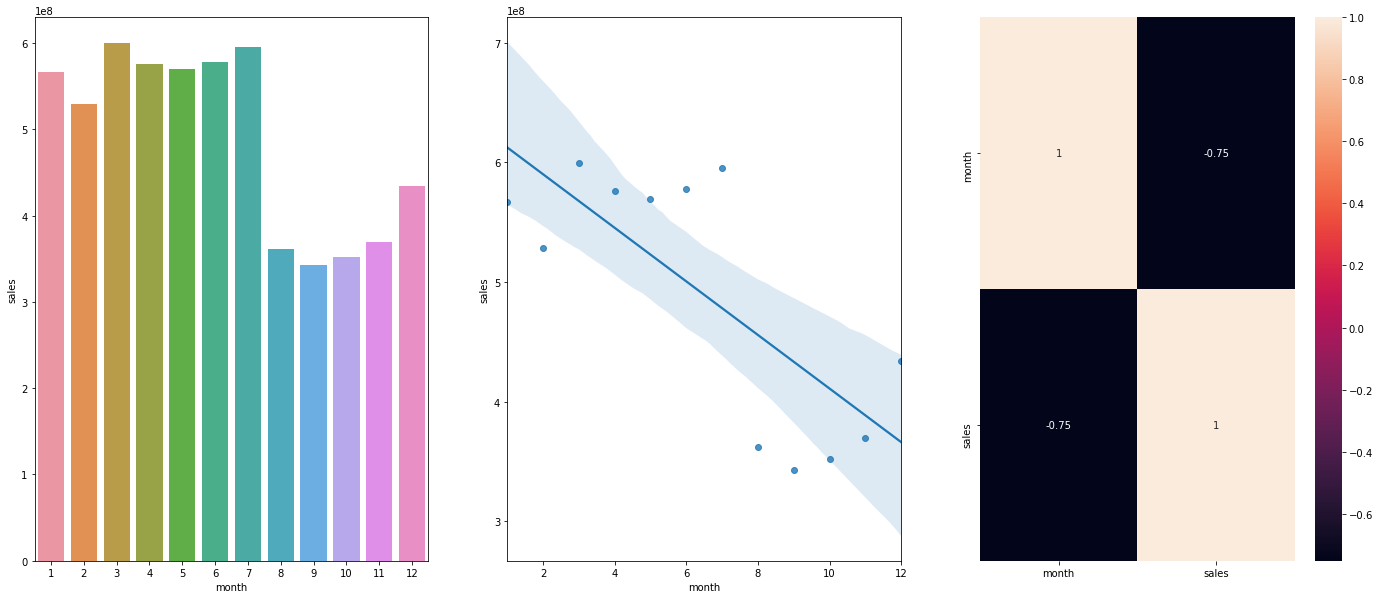

In [50]:
plt.figure(figsize = (24,10))
plt.subplot(1,3,1)
aux1 = df4[['month', 'sales']].groupby('month').sum().reset_index()
sns.barplot(x = 'month', y=  'sales', data = aux1);

plt.subplot(1,3,2)
sns.regplot(x = 'month', y=  'sales', data = aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True)


### **11.** Lojas deveriam vender menos durante os feriados escolares
***verdadeira*** Lojas vendem menos durante os feriados escolares exceto nos meses de Julho e Agosto

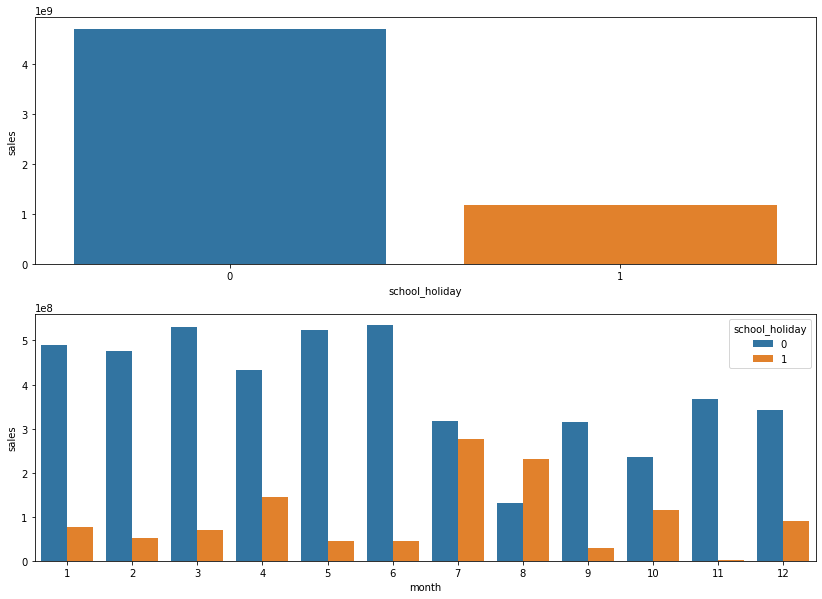

In [63]:
plt.figure(figsize = (14,10))

plt.subplot(2,1,1)
aux1 =df4[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()
sns.barplot(x = 'school_holiday', y =  'sales', data = aux1);

plt.subplot(2,1,2)
aux2 =df4[['month','school_holiday', 'sales']].groupby(['month','school_holiday']).sum().reset_index()
sns.barplot(x = 'month', y =  'sales', hue='school_holiday' ,data = aux2);

#### **12.** Lojas  deveriam vender menos nos finais de semana
***verdadeira*** Lojas vendem menos nos finais de semana

<AxesSubplot:>

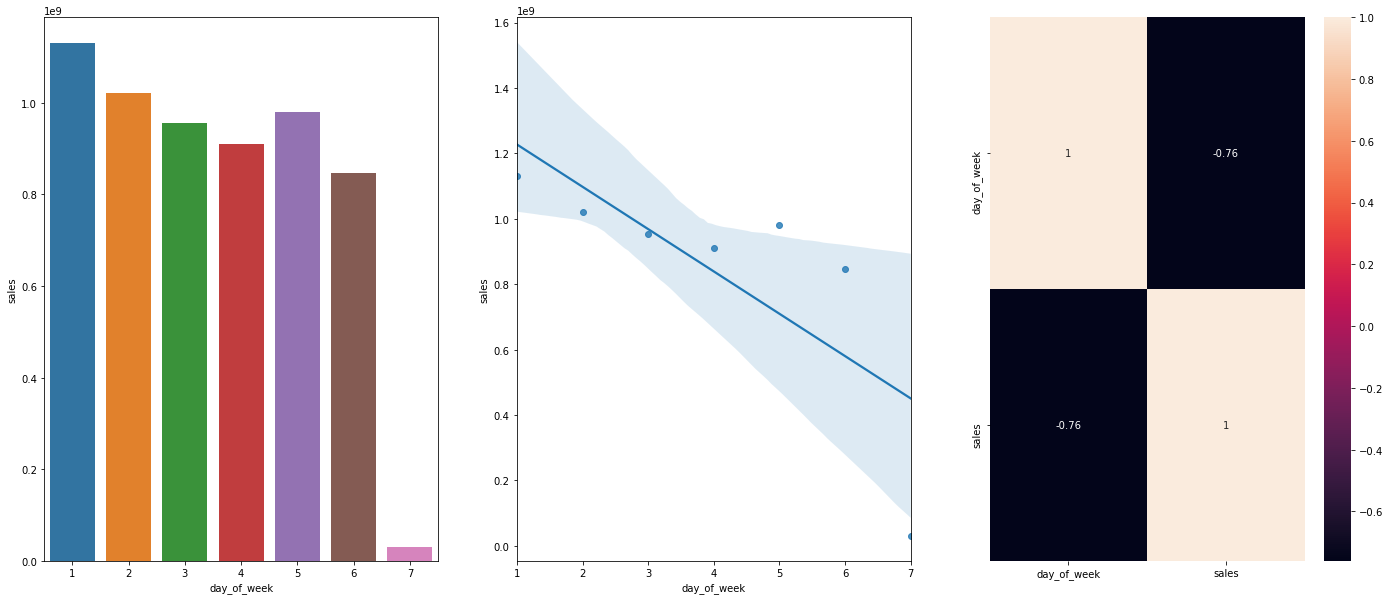

In [58]:
plt.figure(figsize = (24,10))
plt.subplot(1,3,1)
aux1 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()
sns.barplot(x = 'day_of_week', y=  'sales', data = aux1);

plt.subplot(1,3,2)
sns.regplot(x = 'day_of_week', y=  'sales', data = aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True)

### **13.** Lojas com deveriam vender mais depois do dia 10 de cada mês.
***Verdadeira*** lojas vendem mais depois do dia 10 de cada mês

In [53]:
aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
aux1.head(15)

,day,sales,before_after
0,1,155983560,before_10_days
1,2,233513169,before_10_days
2,3,194582812,before_10_days
3,4,228301010,before_10_days
4,5,212869176,before_10_days
5,6,197094539,before_10_days
6,7,201380487,before_10_days
7,8,189718770,before_10_days
8,9,175922427,before_10_days
9,10,181039363,before_10_days


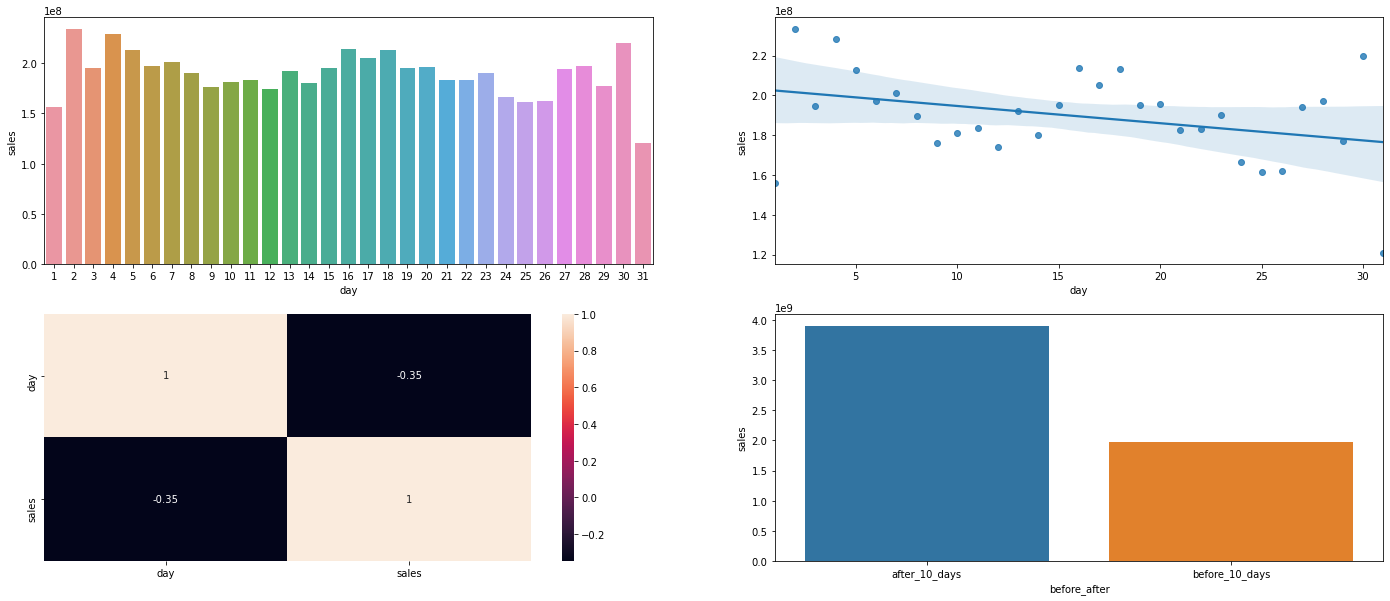

In [56]:
plt.figure(figsize = (24,10))
plt.subplot(2,2,1)
aux1 = df4[['day', 'sales']].groupby('day').sum().reset_index()
sns.barplot(x = 'day', y=  'sales', data = aux1);

plt.subplot(2,2,2)
sns.regplot(x = 'day', y=  'sales', data = aux1);

plt.subplot(2,2,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True)

plt.subplot(2,2,4)
aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
aux2 = aux1[['before_after', 'sales']].groupby('before_after').sum().reset_index()
sns.barplot(x = 'before_after', y = 'sales', data = aux2);

## 4.3 Análise Multivariada